In [1]:
import pyradex

In [11]:
rr = pyradex.Radex(species='sio-h2', temperature=80, density=1e6, column=1e12, deltav=1)

In [13]:
tbl = rr()
tbl

Tex,tau,frequency,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,bytes6,bytes6,float64,float64,float64,float64
-951.9546033460235,-7.161028025820796e-05,43.423853,2.08,01,00,0.08732037833848469,0.029043141788781014,3.9613204547432946e-17,0.06837721254109361
306.2387339232252,0.0008853297835893302,86.846985,6.25,02,01,0.1435665928955683,0.08732037833848469,6.213692425897552e-16,0.2681441877412169
76.09797416293779,0.0076409505699301244,130.268683,12.5,03,02,0.18514049806951788,0.1435665928955683,2.869693322012338e-15,0.5504065197169237
38.13403206328899,0.02337477579343941,173.688238,20.84,04,03,0.1912991724995502,0.18514049806951788,7.217377477155139e-15,0.7786938211457897
26.013773625262264,0.039468454404602706,217.104919,31.26,05,04,0.15664393403574567,0.1912991724995502,1.1721856541611537e-14,0.809441007257046
21.353131338303225,0.04261100848304591,260.518009,43.76,06,05,0.10307952135859477,0.15664393403574567,1.3550911708949152e-14,0.6498619992415481
19.681359495581592,0.032694560749737235,303.926812,58.35,07,06,0.05668324469817437,0.10307952135859477,1.2059629730542552e-14,0.42493653477216187
19.287127690669692,0.01969161383772975,347.330581,75.02,08,07,0.027068543694644585,0.05668324469817437,8.745635296110686e-15,0.23595731449258864


In [15]:
%matplotlib inline
import pylab as pl

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_population
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_p

Text(0.5, 0, 'JU')

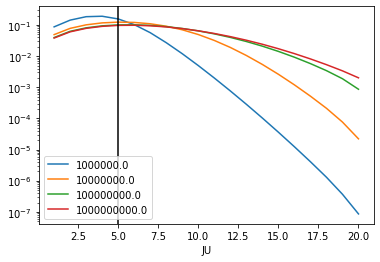

In [25]:
for density in (1e6, 1e7, 1e8, 1e9):
    tbl = rr(density=density)
    pl.semilogy(tbl['upperlevel'].astype('int'), tbl['upperlevelpop'], label=density)
pl.legend(loc='lower left')
pl.axvline(5, color='k')
pl.xlabel("JU")

In [28]:
import numpy as np

In [31]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, 'n(H2)')

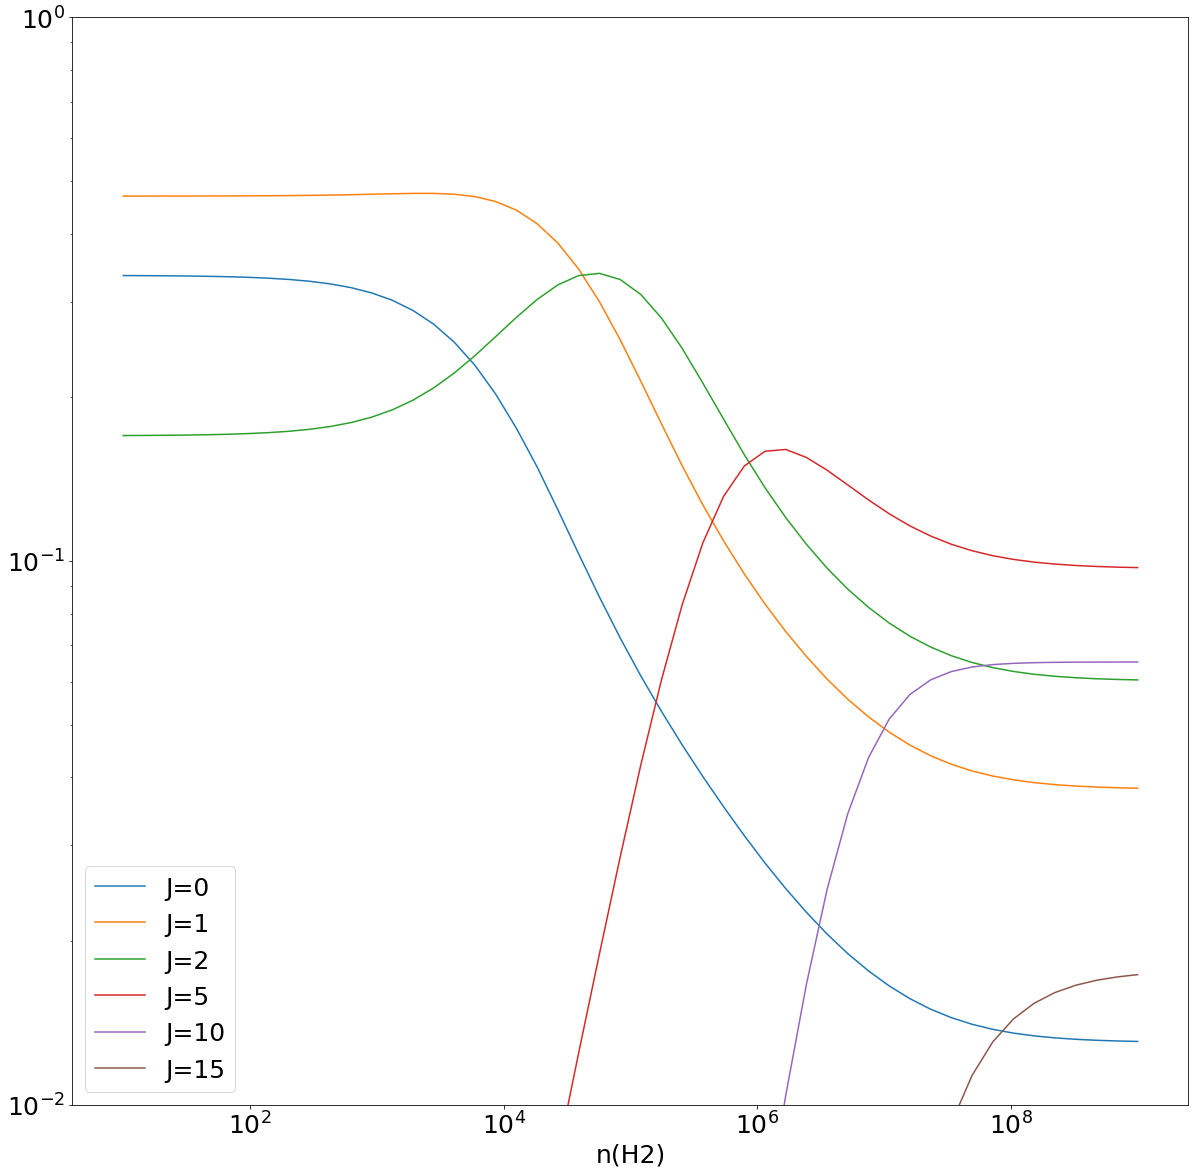

In [40]:
pop0 = [rr(temperature=80, density={'H2':density})['lowerlevelpop'][0] for density in np.logspace(1,9)]
pop1 = [rr(temperature=80, density={'H2':density})['upperlevelpop'][0] for density in np.logspace(1,9)]
pop2 = [rr(temperature=80, density={'H2':density})['upperlevelpop'][1] for density in np.logspace(1,9)]
pop5 = [rr(temperature=80, density={'H2':density})['upperlevelpop'][4] for density in np.logspace(1,9)]
pop10 = [rr(temperature=80, density={'H2':density})['upperlevelpop'][9] for density in np.logspace(1,9)]
pop15 = [rr(temperature=80, density={'H2':density})['upperlevelpop'][14] for density in np.logspace(1,9)]

pl.figure(figsize=(20,20))
pl.rcParams['font.size'] = 25
pl.loglog(np.logspace(1,9), pop0, label='J=0')
pl.loglog(np.logspace(1,9), pop1, label='J=1')
pl.loglog(np.logspace(1,9), pop2, label='J=2')
pl.loglog(np.logspace(1,9), pop5, label='J=5')
pl.loglog(np.logspace(1,9), pop10, label='J=10')
pl.loglog(np.logspace(1,9), pop15, label='J=15')
pl.ylim(1e-2,1)
pl.legend(loc='lower left')
#pl.axvline(5, color='k')
pl.xlabel("n(H2)")

Text(0, 0.5, 'T_B')

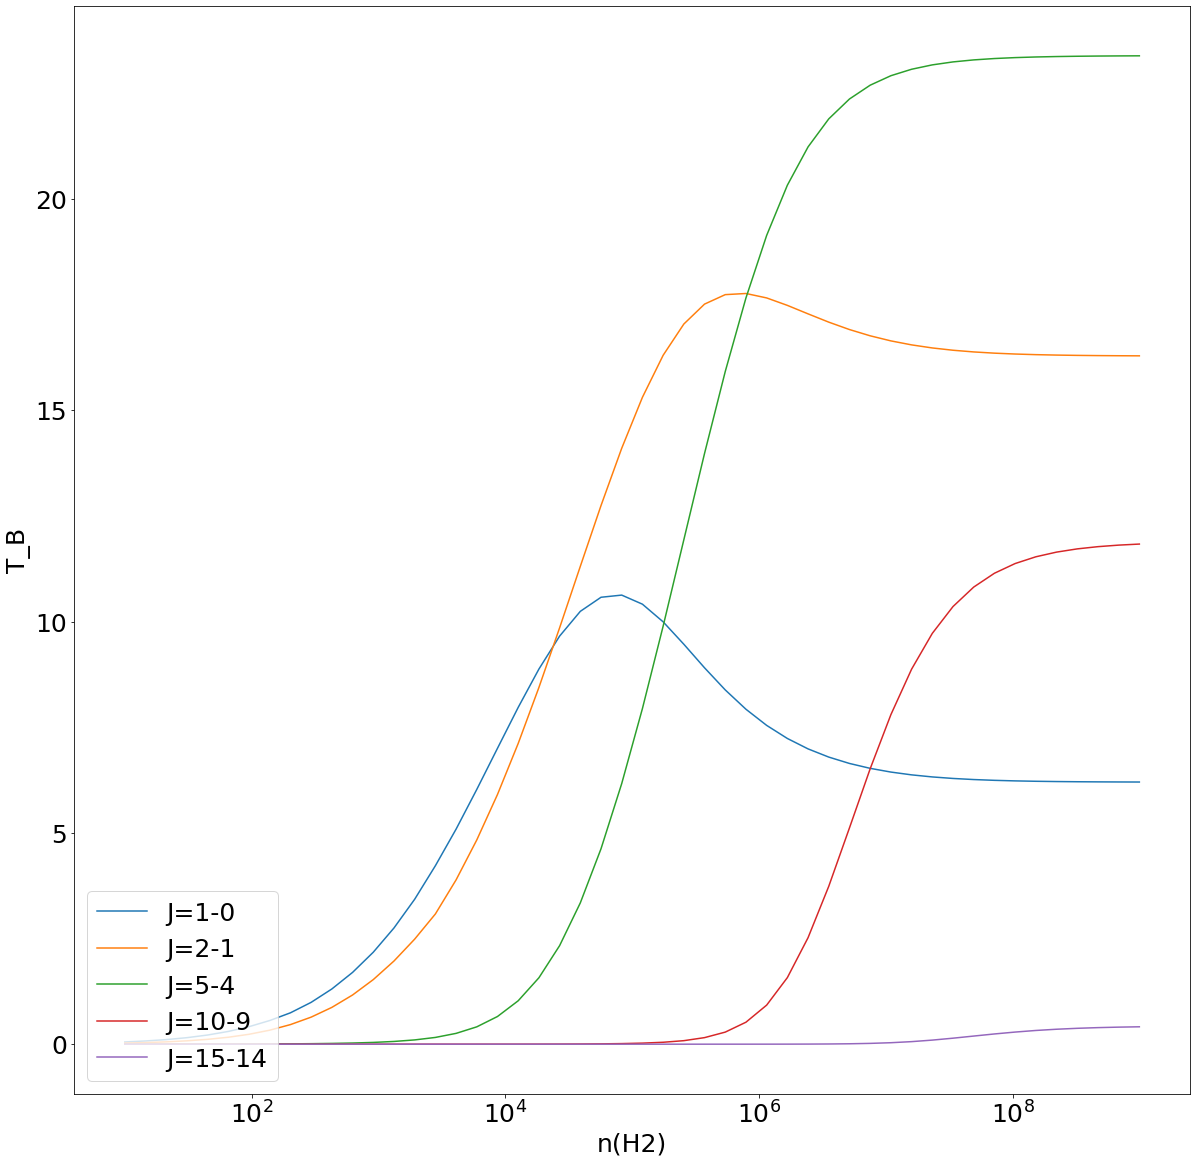

In [51]:
tb1 = [rr(temperature=30,  column=1e14, density={'H2':density})['T_B'][0] for density in np.logspace(1,9)]
tb2 = [rr(temperature=30,  column=1e14, density={'H2':density})['T_B'][1] for density in np.logspace(1,9)]
tb5 = [rr(temperature=30,  column=1e14, density={'H2':density})['T_B'][4] for density in np.logspace(1,9)]
tb10 = [rr(temperature=30, column=1e14,  density={'H2':density})['T_B'][9] for density in np.logspace(1,9)]
tb15 = [rr(temperature=30, column=1e14,  density={'H2':density})['T_B'][14] for density in np.logspace(1,9)]

pl.figure(figsize=(20,20))
pl.rcParams['font.size'] = 25
pl.semilogx(np.logspace(1,9), tb1, label='J=1-0')
pl.semilogx(np.logspace(1,9), tb2, label='J=2-1')
pl.semilogx(np.logspace(1,9), tb5, label='J=5-4')
pl.semilogx(np.logspace(1,9), tb10, label='J=10-9')
pl.semilogx(np.logspace(1,9), tb15, label='J=15-14')
#pl.ylim(0,1)
pl.legend(loc='lower left')
#pl.axvline(5, color='k')
pl.xlabel("n(H2)")
pl.ylabel("T_B")